# Least Squares Using Simulated Data

Now, using our simulated data from the previous step, let’s estimate the optimum values of our variable coefficients, $\alpha$ and $\beta$. Using the predictor variable, `X`, and the output variable, `yact`, we will calculate the values of $\alpha$ and $\beta$ using the Least Squares method described in the lecture.

The cell below creates the same dataframe as previously. Run the cell to get started!

In [1]:
# Import pandas, numpy, and matplotlib.pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate same data as in previous step
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5
ypred = 2 + 0.3 * X
res = 0.5 * np.random.randn(100)
yact = 2 + 0.3 * X + res
df = pd.DataFrame(
    {'X': X,
     'ypred': ypred,
     'yact': yact}
)

# Show the first five rows of our dataframe
df.head()

,X,ypred,yact
0,5.910131,3.773039,4.714615
1,2.500393,2.750118,2.076238
2,3.946845,3.184053,2.548811
3,7.102233,4.130670,4.615368
4,6.168895,3.850668,3.264107


Just to reiterate, here are the formulas for $\alpha$ and $\beta$ again:

 $$\hat\beta=\frac{\sum_{i=1}^n(X_i-\bar X)(Y_i-\bar Y)}{\sum_{i=1}^n(X_i-\bar X)^2}=\frac{\text{cov}(X,Y)}{\text{var}(X)}$$
 
 $$\hat\alpha=\bar Y-\hat\beta * \bar X$$

To calculate these coefficients, we will create a few more columns in our `df` data frame. We need to calculate `xmean` and `ymean` to calculate the covariance of X and Y (`xycov`) and the variance of X (`xvar`) before we can work out the values for `alpha` and `beta`.

In [2]:
# Calculate the mean of X and Y
xmean = np.mean(X)
ymean = np.mean(yact)

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['yact'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}\nbeta = {beta}')

alpha = 2.0031670124623426
beta = 0.3229396867092763


As we can see, the values are only a little different from what we had assumed earlier. 

Let’s see how the value of $R^2$  changes if we use the new values of $\alpha$ and $\beta$. 

The equation for the new model can be written as:
$$ y=2.003 + 0.323 * x $$ 

Let’s create a new column in `df` to accommodate the values generated by this equation and call this `ypred2`, and calculate the new $R^2$. 

In [3]:
# Create new column to store new predictions
df['ypred2'] = alpha + beta * df['X']

# Calculate new SSR with new predictions of Y.
# Note that SST remains the same since yact and ymean do not change.
df['SSR2'] = (df['ypred2'] - ymean)**2
df['SST'] = (df['yact'] - ymean)**2
SSR2 = df['SSR2'].sum()
SST = df['SST'].sum()

# Calculate new R2
R22 = SSR2 / SST
print(f'New R2 = {R22}.')

New R2 = 0.7147163547202341.


The new value of $R^2= 0.715$ shows a slight improvement from the previous value of $R^2=0.618$ (obtained with $\alpha=2,~\beta=0.3$).

Let’s also plot our new prediction model against the actual values and our earlier assumed model, just to get a better visual understanding. 

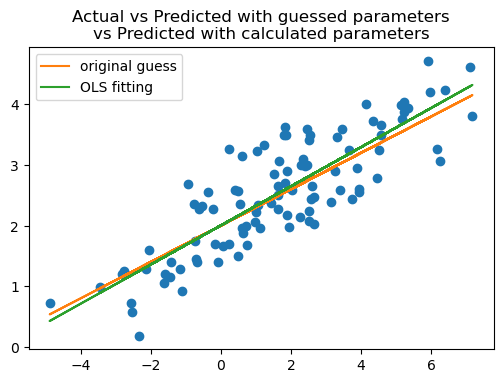

In [4]:
# Plot first prediction as blue line, second prediction as purple line,  and
# actual values of Y as red markers
plt.figure(dpi=100)
plt.plot(X, yact, 'o')
plt.plot(X, ypred, label='original guess')
plt.plot(X, df['ypred2'], label='OLS fitting')


plt.title('''Actual vs Predicted with guessed parameters
vs Predicted with calculated parameters''')

plt.legend()
plt.show()

As we can see, the `ypred2` and `ypred` are more or less overlapping since the respective values of ɑ and β are not very different.

Next, we will explore other methods of determining model efficacy. Go back to the notebook directory and open the notebook called `Reg3_ResultParameters.ipynb`.